In [5]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv("../data/bs_eda_wo_index.csv")

In [7]:

df.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [8]:
features = ['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service','Multiple Lines', 'Online Security', 'Online Backup','Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies','Paperless Billing', 'Monthly Charges', 'Total Charges','Internet Service_DSL', 'Internet Service_Fiber optic','Internet Service_No', 'Contract_Month-to-month', 'Contract_One year','Contract_Two year', 'Payment Method_Bank transfer (automatic)','Payment Method_Credit card (automatic)','Payment Method_Electronic check', 'Payment Method_Mailed check']
target = ['Churn']
data=[features, target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)


In [10]:
len(X_train.columns)

25

In [9]:
# create model instance
bst = XGBClassifier(n_estimators=25, max_depth=2, learning_rate=0.00001, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7413


Accuracy: 0.7370


In [11]:
xgb_model = XGBClassifier(
    n_estimators=100,        # number of trees
    learning_rate=0.01,      # step size shrinkage
    max_depth=5,             # depth of each tree
    subsample=0.8,           # % of samples used per tree
    colsample_bytree=0.8,    # % of features used per tree
    use_label_encoder=False, # to suppress a warning
    eval_metric='logloss'    # evaluation metric
)

# Step 2: Fit the model
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

/home/jai/anaconda3/envs/cis579/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:23:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1742444406357/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8038


In [13]:
# Define the model (no need to pass hyperparameters here)
# No need to include use_label_encoder here
xgb_model2 = XGBClassifier(eval_metric='logloss')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 25],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',      # or 'roc_auc' if you're doing classification
    cv=5,                    # 5-fold cross-validation
    verbose=1,
    n_jobs=-1                # use all available cores
)

# Fit it on training data
grid_search.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test set (optional)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/jai/anaconda3/envs/cis579/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:25:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1742444406357/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jai/anaconda3/envs/cis579/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:25:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1742444406357/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jai/anaconda3/envs/cis579/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:25:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1742444406357/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jai/anaconda3/envs/cis579/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:25:22] 

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 25, 'subsample': 1.0}
Best Accuracy: 0.8019555555555555
Test Accuracy: 0.8187633262260128


/home/jai/anaconda3/envs/cis579/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:26:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1742444406357/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:
from joblib import dump, load

In [17]:
dump(best_model, "xgc_gc.joblib")

['xgc_gc.joblib']

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_graphviz

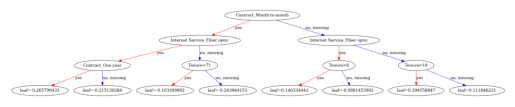

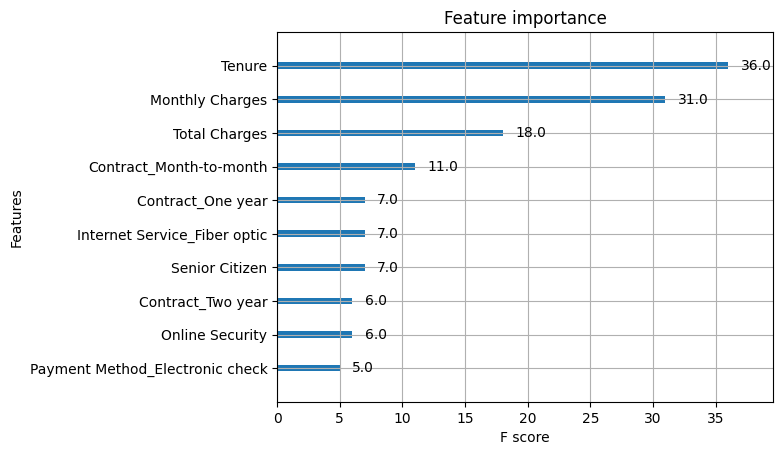

In [28]:
import joblib
xg_model = joblib.load('xgc_gc.joblib')
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Plot the first tree (index 0)
plot_tree(xg_model, num_trees=0)
plt.show()
from xgboost import plot_importance

plot_importance(xg_model, max_num_features=10)
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have test data
y_pred = testerr.predict(X_test)

# If the output is probabilities, convert to class labels
# y_pred = (xg_model.predict_proba(X_test)[:, 1] > 0.5).astype(int)


In [37]:
import matplotlib.pyplot as plt

# Convert DataFrame column to Series or NumPy array
y_test = y_test["Churn"]

# Convert boolean to string labels
y_test_named = ["yes" if i else "no" for i in y_test]
y_pred_named = ["yes" if i else "no" for i in y_pred]

label_map = {0: "no", 1: "yes"}
y_pred_named = [label_map[i] for i in y_pred]
y_test_named = [label_map[i] for i in y_test]

# Make sure your y_test and y_pred are in the same label format (e.g., "yes"/"no")
cm = confusion_matrix(y_test, y_pred, labels=["yes", "no"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes", "no"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


ValueError: At least one label specified must be in y_true

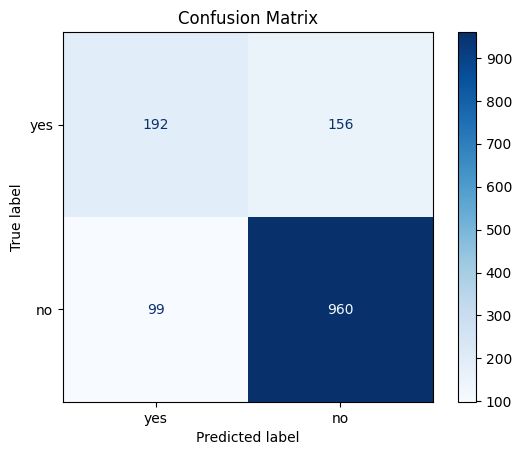

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure y_test is a flat Series with booleans


# Convert booleans to string labels
y_test_named = ["yes" if val else "no" for val in y_test]
y_pred_named = ["yes" if val else "no" for val in y_pred]

# Now compute confusion matrix
cm = confusion_matrix(y_test_named, y_pred_named, labels=["yes", "no"])

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes", "no"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [39]:
y_test

1507    False
4330    False
6626    False
5620     True
4345    False
        ...  
4990    False
5985     True
5288    False
2709    False
1269    False
Name: Churn, Length: 1407, dtype: bool

In [41]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

# Predict on test set
y_pred = testerr.predict(X_test)
y_prob = testerr.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

# Classification report
print(classification_report(y_test, y_pred))


F1 Score: 0.6009389671361502
ROC-AUC: 0.8541361401452248
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1059
        True       0.66      0.55      0.60       348

    accuracy                           0.82      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407

